In [1]:
# imports

# extra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# local
from feature_helpers import *

# display settings
sns.set(style='whitegrid', palette='husl')
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.precision', 4)
pd.set_option('display.width', 1600)

In [2]:
recipes = load_clean_data()

49,718 recipes


In [3]:
metrics = get_metrics(recipes)

In [4]:
# for friendlier plotting
def reshape_tfidfs(tfidfs):
    pairs = []
    for cuisine, vals in tfidfs.iterrows():
        pairs.extend([[cuisine, v] for v in vals if v > 0.0001])
    return pd.DataFrame(pairs, columns=['cuisine', 'tfidf'])
tfidfs = make_tfidfs(recipes.query('cuisine != "test"'))
smoothed_tfidfs = smooth_tfidfs(tfidfs, .6)
reshaped_tfidfs = reshape_tfidfs(tfidfs)
reshaped_smoothed_tfidfs = reshape_tfidfs(smoothed_tfidfs)

In [6]:
metrics

,recipe_count,recipe_length,unique_count,ing_count,rare_count,rare_pct,cuisine
brazilian,467,18,949,8308,396,5,brazilian
british,804,18,1256,14325,489,3,british
cajun_creole,1546,24,1540,37256,584,2,cajun_creole
chinese,2673,26,1718,68647,567,1,chinese
filipino,755,18,1009,13428,354,3,filipino
french,2646,19,2073,49527,659,1,french
greek,1175,20,1199,23302,444,2,greek
indian,3003,23,1601,69661,533,1,indian
irish,667,17,1081,11231,422,4,irish
italian,7838,20,2608,155115,671,0,italian


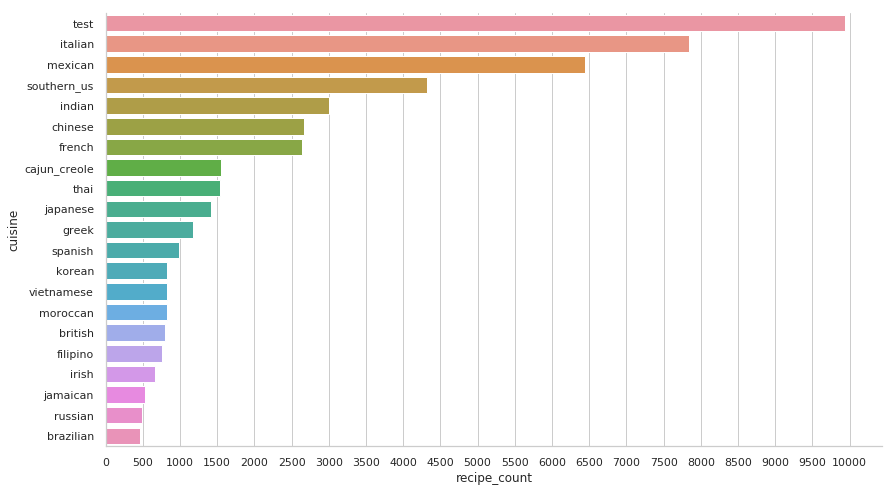

In [7]:
sns.set(style='whitegrid', palette='husl')
recipe_counts_plot = sns.catplot(x='recipe_count', y='cuisine', data=metrics, kind='bar', height=7, aspect=1.8,
                                 order=metrics.recipe_count.sort_values(ascending=False).index)
recipe_counts_plot.set(xticks=range(0, 10500, 500));

In [ ]:
recipe_lengths_plot = sns.catplot(x='recipe_length', y='cuisine', data=metrics, kind='bar', height=7, aspect=1.5,
                                  order=metrics.recipe_length.sort_values(ascending=False).index)
recipe_lengths_plot.set(xticks=range(0, 30, 2));

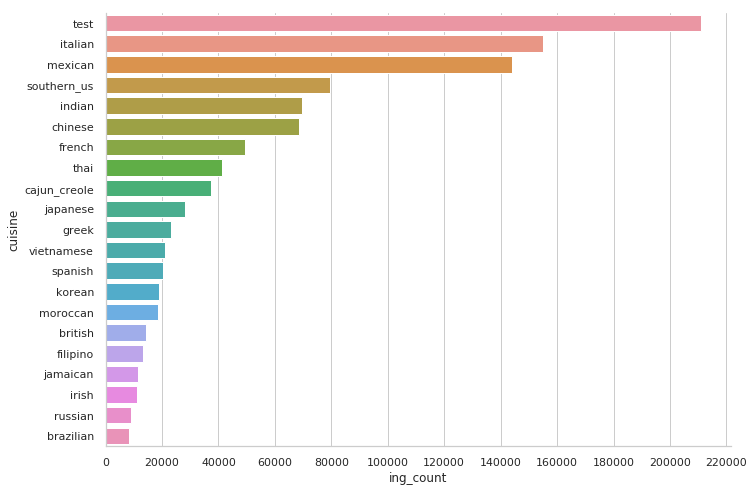

In [8]:
ing_counts_plot = sns.catplot(x='ing_count', y='cuisine', data=metrics, kind='bar', height=7, aspect=1.5,
                              order=metrics.ing_count.sort_values(ascending=False).index)
ing_counts_plot.set(xticks=range(0, 240000, 20000));

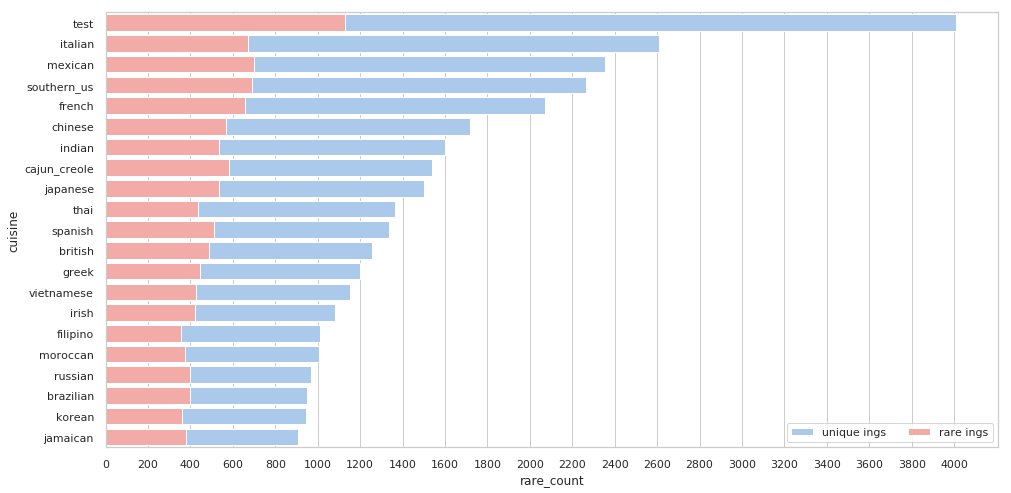

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.set_color_codes('pastel')
unique_counts_plot = sns.barplot(x='unique_count', y='cuisine', data=metrics, label='unique ings', color='b', ax=ax,
                              order=metrics.unique_count.sort_values(ascending=False).index)
rare_counts_plot = sns.barplot(x='rare_count', y='cuisine', data=metrics, label='rare ings', color='r', ax=ax,
                              order=metrics.unique_count.sort_values(ascending=False).index)
ax.legend(ncol=2, loc='lower right', frameon=True)
unique_counts_plot.set(xticks=range(0, 4200, 200));

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
all_tfidfs_plot = sns.distplot(reshaped_tfidfs.tfidf, kde=False)
all_tfidfs_plot.set(xticks=np.arange(0, .46, .02));

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
max_tfidf = reshaped_smoothed_tfidfs.tfidf.max()
all_smoothed_tfidfs_plot = sns.distplot(reshaped_smoothed_tfidfs.tfidf, kde=False)
all_smoothed_tfidfs_plot.set(xticks=np.arange(0, max_tfidf + .05, .1));

In [ ]:
cuisine_tfidfs_plot = sns.catplot(y='tfidf', x='cuisine', data=reshaped_tfidfs, kind='strip', height=7, aspect=2.5,
                             order=metrics.unique_count.sort_values(ascending=False).index)
cuisine_tfidfs_plot.set(yticks=np.arange(0, .45, .05));

In [ ]:
max_tfidf = reshaped_smoothed_tfidfs.tfidf.max()
smoothed_cuisine_tfidfs_plot = sns.catplot(y='tfidf', x='cuisine', data=reshaped_smoothed_tfidfs, kind='strip', height=7, aspect=2.5,
                             order=metrics.unique_count.sort_values(ascending=False).index)
smoothed_cuisine_tfidfs_plot.set(yticks=np.arange(0, max_tfidf + .1, .05));